<a href="https://colab.research.google.com/github/abdalla0/Learning-Transfer-for-Data-from-IoT-Sensors/blob/master/Copy_of_homework_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 3

**Due 9/29/2020.**


## References

+ Lectures 7-10 (inclusive).

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you can either:
    
    - Type the answer using the built-in latex capabilities. In this case, simply export the notebook as a pdf and upload it on gradescope; or
    - You can print the notebook (after you are done with all the code), write your answers by hand, scan, turn your response to a single pdf, and upload on gradescope.

**Note**: 
+ Please match all the pages corresponding to each of the questions when you submit on gradescope. 

**Important:**
If you are running the notebook on Google Colab make sure you make a copy on your Google Drive so that you can resume your work later. To do this click on "File->Save a copy in Drive." Rename the copy as you wish by clicking on the filename you see on the very top. Then make sure you save regularly. If you close your browser, you can resume your work by going to your Google Drive and clicking on the notebook. You can find the notebooks the folder "My Drive/Colab Notebooks."

## Student details

+ **First Name: Mustafa**
+ **Last Name: Abdallah**
+ **Email: abdalla0@purdue.edu**

In [3]:
# Here are some modules that you may need - please run this block of code:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('talk')
import numpy as np
import scipy
import scipy.stats as st

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Problem 0

This is not a real problem. You just have to follow the instruction to make sure that you have access to the required data files for completing the subsequent problems.
There are two data files needed for this purpose:

+ [hw_03_p1B_data.txt](https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/hw_03_p1B_data.txt) which is needed for Problem 1/Part B.

+ [hw_03_p2_data.txt](https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/hw_03_p2_data.txt) which is needed for Problem 2.

Our goal is to make sure that this Jupyter notebook can see these two files.
There are three cases that we are going to consider.
The cases depend on how you accessed the notebook and where you are currently running it.
You only need to choose and carry out the instructions for the case that is relevant to you:

### Instructions for Google Colab
Google Colab gives you a computational session with temporary storage.
The data must be visible from there.
The best way to do this is to put the data in your Google drive and access the drive from this session.
Here is how:
+ First, right click on the two files above and then "Save As." Make sure that the selected format is "text." Remember where you save the files in your local computer.
+ Second, go to your Google Drive. We need to select a folder to put the files. To keep things simple, let's just dump everything in "My Drive/Colab Notebooks," i.e., the same folder that contains the copy of this Jupyter notebook which you should have already made (if not, please see the **important** section at the very top. Once you have entered this folder in your Google Drive (just double click on it), drag and drop the two files in there. This is how your Google Drive should look like:

![Google Drive screenshot](https://github.com/PredictiveScienceLab/data-analytics-se/blob/master/homework/hw_03_google_drive_screenshot.png?raw=1)

+ Now we need to make the Google Drive visible from this computational session.
We do this by *mounting* the drive.
You need to run this code and follow the instructions:

In [8]:
# The following code does not run unless you are running the notebook on Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


+ Finally, change directories so that the data files are in the current working directory:

In [9]:
# Only if you are running on Google Colab...
# Print working directory before changing
!pwd
# Change to the desired directory on Google drive
%cd "/content/drive/My Drive/Colab Notebooks"
# Print working directory after changing
!pwd
# List the contents of the directory - Make sure it does contain the files we want:
!ls

/content
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Colab Notebooks
'Copy of Copy of homework_02.ipynb'  'Copy of python-basics-1.ipynb'
'Copy of hands-on-02.ipynb'	     'Copy of python-basics-2.ipynb'
'Copy of hands-on-03 (1).ipynb'      'Copy of python-basics-3.ipynb'
'Copy of hands-on-03.ipynb'	     'Copy of python-basics-4.ipynb'
'Copy of hands-on-04.1.ipynb'	     'Copy of python-basics-5.ipynb'
'Copy of hands-on-04.2.ipynb'	     'Copy of python-basics-6.ipynb'
'Copy of hands-on-05.ipynb'	     'Copy of python-basics-7.ipynb'
'Copy of homework_01.ipynb'	     'Copy of python-basics-8.ipynb'
'Copy of homework_02.ipynb'	     'Copy of python-basics-9.ipynb'
'Copy of homework_03.ipynb'	      hw_03_p1B_data.txt
'Copy of python-basics-10.ipynb'      hw_03_p2_data.txt
'Copy of python-basics-11.ipynb'


+ Move to the section called **Loading the data**.

### Instructions for personal computers

#### If you have just downloaded the notebook and you are running it locally
+ Locate the folder in which you have the notebook.
+ Right click on the two files above and then "Save As." Make sure that the selected format is "text" and that you save them in the same folder that contains this notebook.
+ Move to the section called **Loading the data**.

#### If you have cloned the entire github repository of the class to your local computer

There is nothing to do. You already have the files in the same folder as this notebook.
If the code below that loads the data does not work, then you are probably not running this notebook from the copy in the github repository.

+ Move to the section called **Loading the data**.

### Loading the data

If you have done everything correctly up to this point you must have the files in the right directory and accessible from this notebook.
Let's test this:

In [10]:
# If this fails you have a problem with the first file
data_p1B = np.loadtxt('hw_03_p1B_data.txt')
print(data_p1B)

[3.61344690e-03 5.18552052e-02 1.11722667e-02 2.06571496e-02
 5.99206883e-02 9.79419775e-03 4.59208573e-02 9.21439269e-02
 1.79397509e-02 9.09569225e-02 7.57149161e-02 2.02674595e-02
 2.94003185e-01 1.46965508e-01 2.56237538e-02 9.74512234e-03
 4.31442979e-02 3.86771478e-02 1.59798997e-01 8.53080419e-02
 3.54181588e-02 1.98526883e-03 1.28792700e-01 1.75617014e-02
 4.54538841e-01 3.56729852e-02 2.33387534e-01 1.97942877e-01
 8.98589803e-02 3.20007812e-03 1.36744972e-01 3.79451359e-02
 9.51120275e-02 1.80382459e-01 8.85783251e-02 6.64257367e-02
 2.38210961e-03 3.26229578e-02 1.14718051e-01 2.07066252e-01
 3.69878691e-02 2.83938824e-01 4.69420498e-02 1.83214601e-02
 3.59923083e-02 2.75287278e-02 1.36586226e-01 2.32228596e-02
 1.33406463e-01 5.19657073e-02 2.28979692e-01 5.95281110e-02
 5.23407052e-02 7.19993082e-02 8.11413908e-02 2.34530756e-01
 1.26757541e-01 9.88047443e-03 6.25400103e-01 2.45900728e-03
 1.15339159e-02 5.19132289e-03 1.79761121e-02 3.47137803e-02
 8.34942204e-02 5.083810

In [11]:
# If this fails you have a problem with the second file
data_p2 = np.loadtxt('hw_03_p2_data.txt')
print(data_p1B)

[3.61344690e-03 5.18552052e-02 1.11722667e-02 2.06571496e-02
 5.99206883e-02 9.79419775e-03 4.59208573e-02 9.21439269e-02
 1.79397509e-02 9.09569225e-02 7.57149161e-02 2.02674595e-02
 2.94003185e-01 1.46965508e-01 2.56237538e-02 9.74512234e-03
 4.31442979e-02 3.86771478e-02 1.59798997e-01 8.53080419e-02
 3.54181588e-02 1.98526883e-03 1.28792700e-01 1.75617014e-02
 4.54538841e-01 3.56729852e-02 2.33387534e-01 1.97942877e-01
 8.98589803e-02 3.20007812e-03 1.36744972e-01 3.79451359e-02
 9.51120275e-02 1.80382459e-01 8.85783251e-02 6.64257367e-02
 2.38210961e-03 3.26229578e-02 1.14718051e-01 2.07066252e-01
 3.69878691e-02 2.83938824e-01 4.69420498e-02 1.83214601e-02
 3.59923083e-02 2.75287278e-02 1.36586226e-01 2.32228596e-02
 1.33406463e-01 5.19657073e-02 2.28979692e-01 5.95281110e-02
 5.23407052e-02 7.19993082e-02 8.11413908e-02 2.34530756e-01
 1.26757541e-01 9.88047443e-03 6.25400103e-01 2.45900728e-03
 1.15339159e-02 5.19132289e-03 1.79761121e-02 3.47137803e-02
 8.34942204e-02 5.083810

## Problem 1
### Part A
Let $X$ be a continuous random variable with CDF:
$$
F(x) = p(X \le x).
$$
Show that the random variable
$$
Z = F(X)
$$
    is distributed uniformly in $[0,1]$.
    Hint: Show that:
$$
    F_Z(z) := p(Z \le z) = z.
$$
**Proof:**

*Type your proof here. Delete that ``<br>`` line (it just makes some white space).*
<br><br><br><br><br><br><br><br><br><br>

### Part B

**Note (Before you attempt this part of the problem):** To do this problem your Jupyter notebook needs to be able to see this data file: [hw_03_p1B_data.txt](https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/hw_03_p1B_data.txt).
For this to happen the file must be in the same folder as the Jupyter notebook notebook.
There are two cases:
+ If you are using Google Colab:
    - In this Jupyter notebook do "File->Save A Copy in Drive"
    - Write click on [hw_03_p1B_data.txt](https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/hw_03_p1B_data.txt) and click "Save Link As." Make sure that you save the link as text and that you make a note where it is.
    - Open your Google Drive in a separate tab. Go to the folder "Colab Notebooks" which was automatically created when you saved a copy of the notebook. Drag and drop the hw_03_p1B_data.txt file you just downloaded in that folder.
+ If you are running the Jupyter notebook on your own computer:
    - If you cloned the github repository, then the file will be there.
    - If you downloaded the notebook manually, then download the file as per the instructions for Google Colab and put it in the same folder as the Jupyter notebook.

The theorem you have just proved is very useful when you want to test if a set of observations $x_1,x_2,\dots,x_N$ has been indeed independent realizations of a random variable $X$ with CDF $F(x)$.
Part A proves that, if this hypothesis is valid, then the transformed dataset $z_1,z_2,\dots,z_N$, where
$$
z_i = F(x_i),
$$
should be distributed uniformely in $[0,1]$.
In other words, the empirical histrogram of $z_1,z_2,\dots,z_N$ should be a flat line.
Use this observation to find the distribution from which this dataset was sampled:

Text(0.5, 1.0, 'Histogram of data')

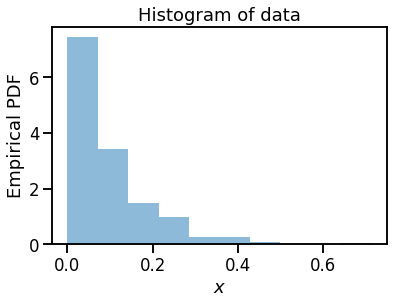

In [12]:
# If the following fails, please read the intructions above
data = np.loadtxt('hw_03_p1B_data.txt')
fig, ax = plt.subplots()
ax.hist(data, density=True, alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('Empirical PDF')
ax.set_title('Histogram of data')

The correct distribution is one of the following:

1. Standard normal, $\mathcal{N}(0,1)$;

2. Normal with mean 2 and variance 2, $\mathcal{N}(2,2)$; or

3. Exponential with rate parameter $1$, $\mathcal{E}(1)$; or

4. Exponential with rate parameter $2$, $\mathcal{E}(2)$; or

5. Exponential with rate parameter $10$, $\mathcal{E}(10)$; or

6. Gamma distribution with parameters $\alpha=2.$ and $\beta=3.$.

Systematically go over these distributions and try to determine which one generated the data.
All the required CDF's and inverse CDF's are implemented in [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).
Check also [scipy.stats.rv_continuous](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous).)
Please pay special attention to the defintiion of the probability distributions of the various random variables and how you can control their parameters.
As a hint, here is how you can test for $\mathcal{N}(0,1)$:

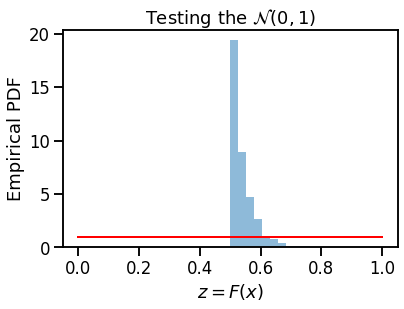

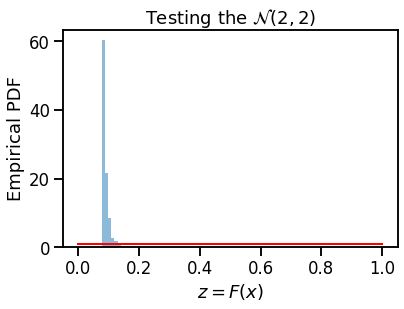

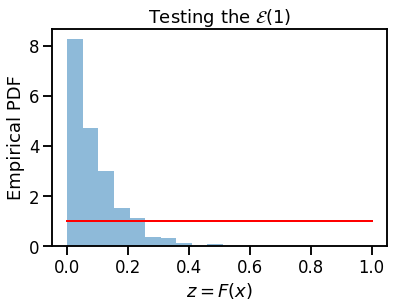

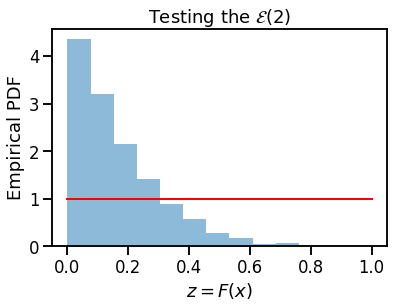

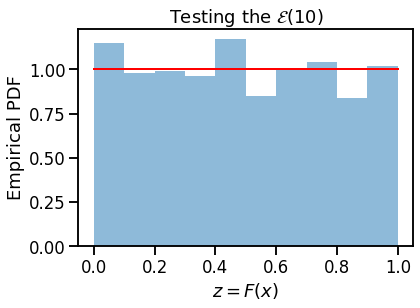

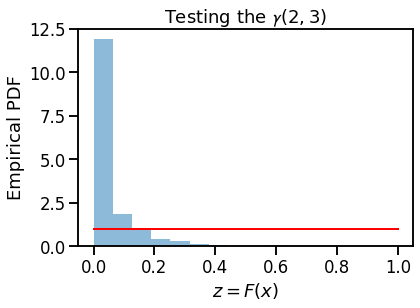

In [13]:
# Testing for N(0,1):
transformed_data = st.norm(loc=0, scale=1).cdf(data) # cdf() gives the CDF of a random variable
# If the data came from N(0,1), the histogram of the transformed_data should match that of a uniform:
fig, ax = plt.subplots()
ax.hist(transformed_data, density=True, alpha=0.5)
ax.plot(np.linspace(0, 1,50), np.ones(50), lw=2, color='r') # This is the line that you should try to much.
ax.set_xlabel('$z = F(x)$')
ax.set_ylabel('Empirical PDF')
ax.set_title('Testing the $\mathcal{N}(0,1)$');

# Testing for N(2,2):
transformed_data = st.norm(loc=2, scale=np.sqrt(2)).cdf(data) # cdf() gives the CDF of a random variable
# If the data came from N(0,1), the histogram of the transformed_data should match that of a uniform:
fig, ax = plt.subplots()
ax.hist(transformed_data, density=True, alpha=0.5)
ax.plot(np.linspace(0, 1,50), np.ones(50), lw=2, color='r') # This is the line that you should try to much.
ax.set_xlabel('$z = F(x)$')
ax.set_ylabel('Empirical PDF')
ax.set_title('Testing the $\mathcal{N}(2,2)$');

# Testing for exponential with rate parameter 1 "E(1)"":
transformed_data = st.expon(loc=0, scale=1).cdf(data) # cdf() gives the CDF of a random variable
# If the data came from N(0,1), the histogram of the transformed_data should match that of a uniform:
fig, ax = plt.subplots()
ax.hist(transformed_data, density=True, alpha=0.5)
ax.plot(np.linspace(0, 1,50), np.ones(50), lw=2, color='r') # This is the line that you should try to much.
ax.set_xlabel('$z = F(x)$')
ax.set_ylabel('Empirical PDF')
ax.set_title('Testing the $\mathcal{E}(1)$');

# Testing for exponential with rate parameter 2 "E(2)"":
transformed_data = st.expon(loc=0, scale=0.5).cdf(data) # cdf() gives the CDF of a random variable
# If the data came from N(0,1), the histogram of the transformed_data should match that of a uniform:
fig, ax = plt.subplots()
ax.hist(transformed_data, density=True, alpha=0.5)
ax.plot(np.linspace(0, 1,50), np.ones(50), lw=2, color='r') # This is the line that you should try to much.
ax.set_xlabel('$z = F(x)$')
ax.set_ylabel('Empirical PDF')
ax.set_title('Testing the $\mathcal{E}(2)$');


# Testing for exponential with rate parameter 10 "E(10)"":
transformed_data = st.expon(loc=0, scale=0.1).cdf(data) # cdf() gives the CDF of a random variable
# If the data came from N(0,1), the histogram of the transformed_data should match that of a uniform:
fig, ax = plt.subplots()
ax.hist(transformed_data, density=True, alpha=0.5)
ax.plot(np.linspace(0, 1,50), np.ones(50), lw=2, color='r') # This is the line that you should try to much.
ax.set_xlabel('$z = F(x)$')
ax.set_ylabel('Empirical PDF')
ax.set_title('Testing the $\mathcal{E}(10)$');


# Testing for Gamma distribution with parameters α=2. and  β=3:
transformed_data = st.gamma(loc = 0, a=2, scale=0.3333).cdf(data) # cdf() gives the CDF of a random variable 
# If the data came from N(0,1), the histogram of the transformed_data should match that of a uniform:
fig, ax = plt.subplots()
ax.hist(transformed_data, density=True, alpha=0.5)
ax.plot(np.linspace(0, 1,50), np.ones(50), lw=2, color='r') # This is the line that you should try to much.
ax.set_xlabel('$z = F(x)$')
ax.set_ylabel('Empirical PDF')
ax.set_title('Testing the $\mathcal{\gamma}(2,3)$');





## Problem 2

**Note:** This problem also requires a data file. This file: [hw_03_p2_data.txt](https://raw.githubusercontent.com/PredictiveScienceLab/data-analytics-se/master/homework/hw_03_p2_data.txt). Please follow the same directions we gave in Part B of Problem 1 above.

Consider the following data set $x_1,\dots,x_N$:

Text(0, 0.5, 'Empirical PDF')

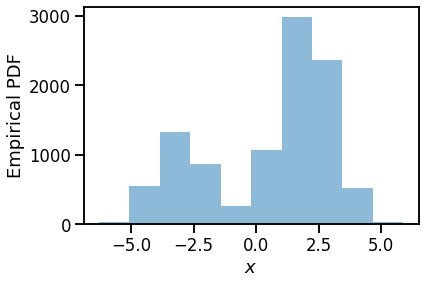

In [14]:
# If the following fails, please look at the note above.
data = np.loadtxt('hw_03_p2_data.txt')
data = np.array(data)
fig, ax = plt.subplots()
ax.hist(data, alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('Empirical PDF')

Your goal is to generate a procedure that samples from the same distribution as the observed data. 
This is a variation of the standard *density estimation* problem.
In general, this is a very difficult problem and we will see various ways to solve it later on.
In this problem, you will develop a simple method that relies on the empirical CDF of the observed data.
Needless to say, this method works only for one dimensional cases in which you have a lot of observations.

The [empirical CDF](https://en.wikipedia.org/wiki/Empirical_distribution_function) of our data set, $x_1,\dots,x_N$ is defined to be:
$$
\hat{F}_N(x) = \frac{\text{Number of observations}\;\le x}{N} = \frac{1}{N}\sum_{i=1}^N 1_{[x_i,+\infty]}(x),
$$
where $1_A(x)$ is the [indicator function](https://en.wikipedia.org/wiki/Indicator_function) of the set $A$.
Using the, so called, [strong law of large numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers#Strong_law), we can show that $\hat{F}_N(x)$ converges to the true CDF of the data as $N\rightarrow+\infty$.

### Part A

Complete the code that calculates the empirical CDF:

In [15]:
def myECDF_base(x):
    """
    Make this code work if ``x`` is a simple scalar.
    
    :param x:    The point at which you want to observe the PDF.
    :returns:    The value of the empirical CDF at ``x``.
    """
    N = data.shape[0]
    
    # Write your code here (delete the next line and return the right value)
    count = 0
    for i in data: 
        if i <= x : 
            count = count + 1
    return count / N

# Vectorize your function (i.e., make it work with 1D numpy arrays).
# See this: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vectorize.html
myECDF = np.vectorize(myECDF_base)

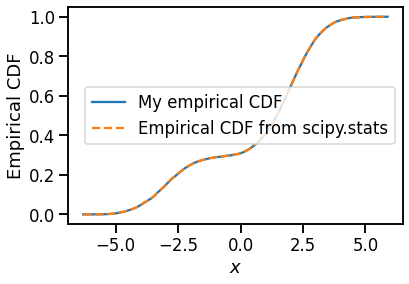

In [16]:
# You can test your results by comparing the empirical CDF you can get with of scipy.stats
# The two should match almost exactly
hist_rv = st.rv_histogram(np.histogram(data, bins=1000))
fig, ax = plt.subplots()
# The range in which the x's takes values:
x_min = data.min()
x_max = data.max()
xx = np.linspace(x_min, x_max, 100)
ax.plot(xx, myECDF(xx), label='My empirical CDF')
ax.plot(xx, hist_rv.cdf(xx), '--', label='Empirical CDF from scipy.stats')
ax.set_xlabel('$x$')
ax.set_ylabel('Empirical CDF')
plt.legend(loc='best')

### Part B

Now complete the code that computes the inverse of the empirical CDF $\hat{F}^{-1}$.
There are may ways of doing this.
Let's do it in a way that will teach us something about the root finding toolbox of numpy (see [this](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar)).
Mathematically, we wish to find a function $F^{-1}$ such that
$$
F(F^{-1}(u))) = u,
$$
for any $u\in[0,1]$ (the domain in which $F(x)$ takes values).
It is obvious that $F^{-1}(u)$ is the solution to the *root finding* problem:
$$
F(x^*) = u.
$$
Since we know that $F$ is increasing, this problem must have a unique solution for any $u\in[0,1]$.
To find this solution, we can use [Brent's method](https://en.wikipedia.org/wiki/Brent%27s_method).
Please note, that the problem that this code solves is of the form:
$$
g(x^*) = 0.
$$
So, you will have to reformulate the original problem as:
$$
F(x^*) - u = 0.
$$
Study the [numpy implementation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.brentq.html#scipy.optimize.brentq) of Brent's method and complete the following code:

In [17]:
from scipy import optimize    # Gives you access to optimize.brentq

def myiECDF_base(u):
    """
    Evaluates the inverse of the empirical CDF.
    
    :param u:   A scalar at which to evaluate the function.
    :returns:    The value of the inverse of the empirical CDF at ``u``.
    """
    # Write your code here
    # You will have to define a functioin to pass to optimize.brentq
    # You can define this function in here
    def f(x):
        return (myECDF_base(x) - u)
    root = optimize.brentq(f, x_min, x_max)
    return root

# Vectorize your function (i.e., make it work with 1D numpy arrays).
# See this: https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vectorize.html
myiECDF = np.vectorize(myiECDF_base)

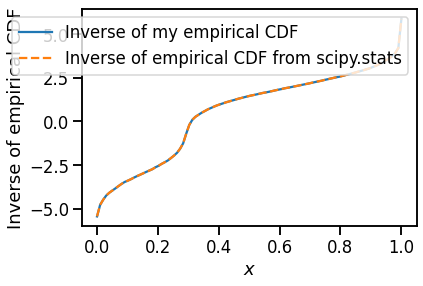

In [18]:
# You can test your results by comparing the inverse of the empirical CDF you can get with scipy.stats
# The two should match almost exactly
hist_rv = st.rv_histogram(np.histogram(data, bins=1000))
fig, ax = plt.subplots()
uu = np.linspace(1e-3, 1, 100)    # For convergence issues we cannot start at 0
ax.plot(uu, myiECDF(uu), label='Inverse of my empirical CDF')
ax.plot(uu, hist_rv.ppf(uu), '--', label='Inverse of empirical CDF from scipy.stats')
ax.set_xlabel('$x$')
ax.set_ylabel('Inverse of empirical CDF')
plt.legend(loc='best')

### Part C

Now use the *inverse transform sampling* method to generate samples from same distribution as the original data.
That is, you can now generate uniform samples:
$$
u_i \sim U([0,1]),
$$
and transform them as:
$$
\hat{x}_i = {\hat{F}}^{-1}(u_i).
$$
The $\hat{x}_i$'s generated in this way should have the same distribution of the data you started with.
Verify this by comparing the histrogram of $1,000$ $\hat{x}_i$ samples with the original data of this problem.

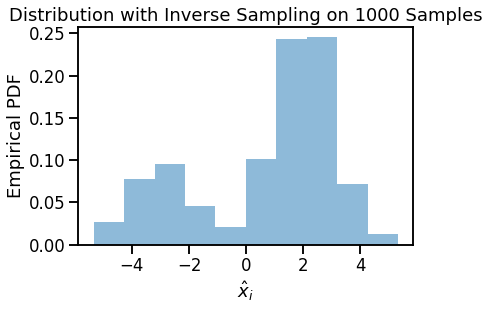

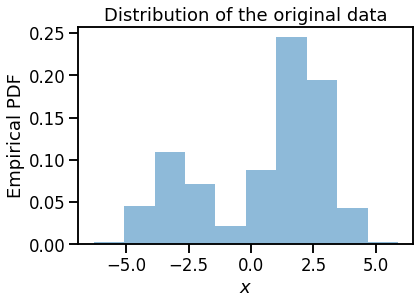

In [19]:
# Write your code here.
# Feel free to copy paste code from above.
Num_samples = 1000
u = np.random.uniform(0,1,1000)
x = myiECDF(u)
fig, ax = plt.subplots()
ax.hist(x, density=True, alpha=0.5)
ax.set_xlabel('$\hat{x}_i$')
ax.set_ylabel('Empirical PDF')
ax.set_title('Distribution with Inverse Sampling on 1000 Samples');

fig, ax = plt.subplots()
ax.hist(data, density=True, alpha=0.5)
ax.set_xlabel('$x$')
ax.set_ylabel('Empirical PDF')
ax.set_title('Distribution of the original data');

## Problem 3

This is a classic uncertainty propagation problem that you will have to solve using Monte Carlo sampling.
Consider the following stochastic harmonic oscillator:
$$
\begin{array}{ccc}
\ddot{y} + 2 \zeta \omega(X) \dot{y} + \omega^2(X)y &=& 0,\\
y(0) &=& y_0(X),\\
\dot{y}(0) &=& v_0(X),
\end{array}
$$
where:
+ $X = (X_1, X_2, X_3)$,
+ $X_i \sim N(0, 1)$,
+ $\omega(X) = 2\pi + X_1$, 
+ $\zeta = 0.01$,
+ $y_0(X) = 1+ 0.1 X_2$, and
+ $v_0 = 0.1 X_3$.

In words, this stochastic harmonic oscillator has an uncertain natural frequency and uncertain initial conditions.

Our goal is to propagate uncertainty through this dynamical system, i.e., estimate the mean and variance of its solution.
A solver for this dynamical system is given below:

In [1]:
class Solver(object):
    def __init__(self, nt=100, T=5):
        """
        This is the initializer of the class.
        
        Arguments:
            nt - The number of timesteps.
            T  - The final time.
        """
        self.nt = nt
        self.T = T
        self.t = np.linspace(0, T, nt) # The timesteps on which we will get the solution
        # The following are not essential, but they are convenient
        self.num_input = 3             # The number of inputs the class accepts
        self.num_output = nt           # The number of outputs the class returns
        
    def __call__(self, x):
        """
        This special class method emulates a function call.
        
        Arguments:
            x - A 1D numpy array with 3 elements. This represents the stochastic input x = (x1, x2, x3).
        """
        ##uncertain quantities 
        x1 = x[0]
        x2 = x[1]
        x3 = x[2]
        
        #ODE parameters 
        omega = 2*np.pi + x1 
        y10 = 1 + 0.1*x2
        y20 = 0.1*x3
        y0 = np.array([y10, y20])   #initial conditions 
        
        #coefficient matrix 
        zeta = 0.01
        k = omega**2    ##spring constant
        c = 2*zeta*omega   ##damping coeff. 
        C = np.array([[0, 1],[-k, -c]])
        
        #RHS of the ODE system
        def rhs(y, t):
            return np.dot(C, y)
        
        y = scipy.integrate.odeint(rhs, y0, self.t)
        
        return y

Let's plot a few samples of the forward model to demonstrate how the solver works.

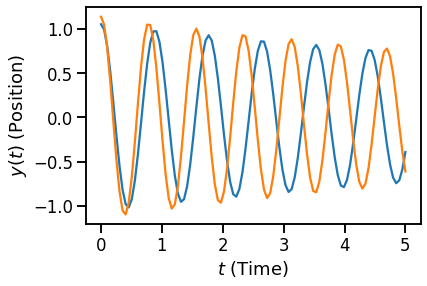

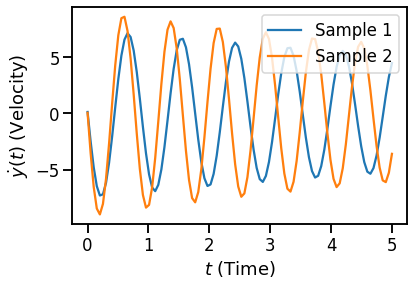

In [4]:
# 1. Create the solver object
solver = Solver()
fig1, ax1 = plt.subplots()
ax1.set_xlabel('$t$ (Time)')
ax1.set_ylabel('$y(t)$ (Position)')
fig2, ax2 = plt.subplots()
ax2.set_xlabel('$t$ (Time)')
ax2.set_ylabel('$\dot{y}(t)$ (Velocity)')
for i in range(2):
    # Sample the random inputs (they are just standard normal)
    x = np.random.randn(solver.num_input) # solver.num_input is just 3
    # Evaluate the solver response
    y = solver(x) # This returns an (num timesteps) x (num states) array (100 x 2 here)
    # Plot the sample
    ax1.plot(solver.t, y[:, 0])
    ax2.plot(solver.t, y[:, 1], label='Sample {0:d}'.format(i+1))
plt.legend(loc=True)

For your convenience, here is code that takes many samples of the solver at once:

In [6]:
def take_samples_from_solver(num_samples):
    """
    Takes ``num_samples`` from the ODE solver.
    
    Returns them in an array of the form: ``num_samples x 100 x 2`` (100 timesteps, 2 states (position, velocity))
    """
    samples = np.ndarray((num_samples, 100, 2))
    for i in range(num_samples):
        samples[i, :, :] = solver(np.random.randn(solver.num_input))
    return samples

It works like this:

In [7]:
samples = take_samples_from_solver(50)
print(samples.shape)
print(samples)

(50, 100, 2)
[[[ 8.42050071e-01 -1.17737149e-01]
  [ 7.98244331e-01 -1.60229073e+00]
  [ 6.82791227e-01 -2.93356775e+00]
  ...
  [-3.36152441e-01  3.19223790e+00]
  [-1.62685204e-01  3.62443003e+00]
  [ 2.43940460e-02  3.72751025e+00]]

 [[ 1.04692150e+00 -1.10323196e-01]
  [ 9.88869354e-01 -2.16686502e+00]
  [ 8.31941204e-01 -3.99287142e+00]
  ...
  [ 6.73881591e-01  2.28919242e+00]
  [ 7.53337219e-01  8.32134385e-01]
  [ 7.56681743e-01 -6.99181916e-01]]

 [[ 9.73952050e-01 -3.96846298e-03]
  [ 9.24880980e-01 -1.92075107e+00]
  [ 7.83395925e-01 -3.63279494e+00]
  ...
  [ 6.15553824e-01  2.25662993e+00]
  [ 6.96362381e-01  9.17721235e-01]
  [ 7.06842837e-01 -5.04693957e-01]]

 ...

 [[ 1.00610196e+00  1.10357993e-01]
  [ 9.92121348e-01 -6.61683063e-01]
  [ 9.39748855e-01 -1.40504085e+00]
  ...
  [ 8.04228893e-01 -8.55259882e-01]
  [ 7.45805323e-01 -1.45040611e+00]
  [ 6.58710267e-01 -1.98700115e+00]]

 [[ 1.10008848e+00 -1.51698518e-02]
  [ 1.06019124e+00 -1.55393035e+00]
  [ 9.4512925

### Part A
Take 100 samples of the solver output and plot the estimated mean position and velocity as a function of time along with a 95\% epistemic uncertainty interval around it. 
This interval captures how sure you are about the mean response when using only 100 Monte Carlo samples.
You need to use the central limit theorem to find it (see the lecture notes).

Text(0, 0.5, '$\\mathbb{E}[\\dot{y}(t)]$')

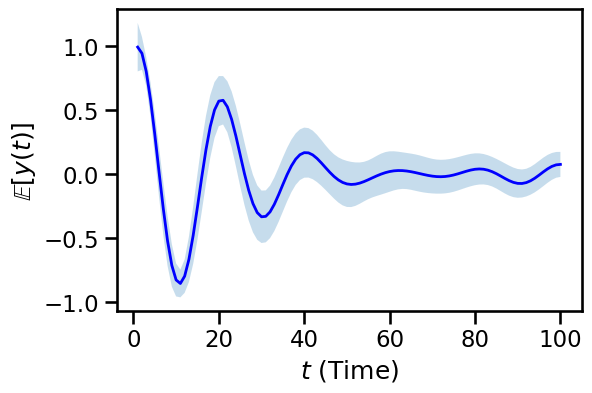

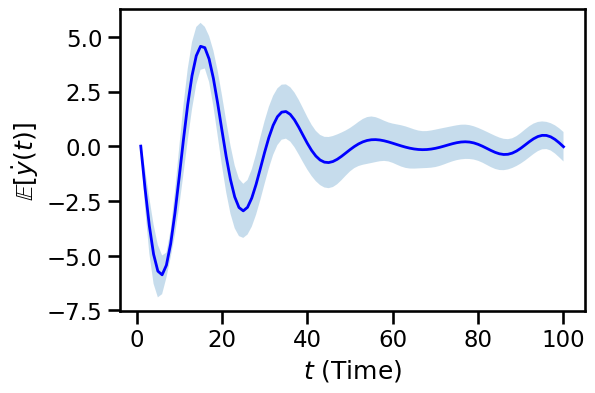

In [74]:
samples = take_samples_from_solver(100)
# Sampled positions are: samples[:, :, 0]
# Sampled velocities are: samples[:, :, 1]
# Sampled position at the 10th timestep is: samples[:, 9, 0]
# etc.

# Your code here
N = 100

# Evaluate the sample average for the Position and Velocity
Position_running = np.cumsum(samples[:, :, 0], axis = 0)[-1,:] / N
Velocity_running = np.cumsum(samples[:, :, 1],axis=0)[-1,:] / N

# Evaluate the second moment for the Position and Velocity
Position_2_running = np.cumsum(samples[:, :,0] ** 2, axis = 0)[-1,:] / N
Velocity_2_running = np.cumsum(samples[:, :,1] ** 2, axis = 0)[-1,:] / N


# Evaluate the running average of the variance
sigma2_running_position = Position_2_running - Position_running ** 2
sigma2_running_velocity = Velocity_2_running - Velocity_running ** 2

# Alright, now we have quantified our uncertainty about I for every N
# from a single MC run. Let's plot a (about) 95% predictive interval
# Running lower bound for the predictive interval
Position_lower_running = Position_running - 2.0 * np.sqrt(sigma2_running_position / np.arange(1, N + 1))
Velocity_lower_running = Velocity_running - 2.0 * np.sqrt(sigma2_running_velocity / np.arange(1, N + 1))

# Running upper bound for the predictive interval
Position_upper_running = Position_running + 2.0 * np.sqrt(sigma2_running_position / np.arange(1, N + 1))
Velocity_upper_running = Velocity_running + 2.0 * np.sqrt(sigma2_running_velocity / np.arange(1, N + 1))


# The plot for Position estimates
fig, ax = plt.subplots(dpi=100)
# Shaded area for the interval
ax.fill_between(np.arange(1, N + 1), Position_lower_running, Position_upper_running, alpha=0.25)
# Here is the MC estimate:
ax.plot(np.arange(1, N+1), Position_running, 'b', lw=2)
# The true value
#ax.plot(np.arange(1, N+1), samples[99,:,0] , color='r')
# and the labels
ax.set_xlabel('$t$ (Time)')
ax.set_ylabel(r'$\mathbb{E}[y(t)]$'); 

# The plot for Velocity estimates
fig, ax = plt.subplots(dpi=100)
# Shaded area for the interval
ax.fill_between(np.arange(1, N + 1), Velocity_lower_running, Velocity_upper_running, alpha=0.25)
# Here is the MC estimate:
ax.plot(np.arange(1, N+1), Velocity_running, 'b', lw=2)
# The true value
#ax.plot(np.arange(1, N+1), samples[99,:,0] , color='r')
# and the labels
ax.set_xlabel('$t$ (Time)')
ax.set_ylabel('$\mathbb{E}[\dot{y}(t)]$')

### Part B

Plot the epistemic uncertainty about the mean position at $t=5$s as a function of the number of samples. 

**Solution**:

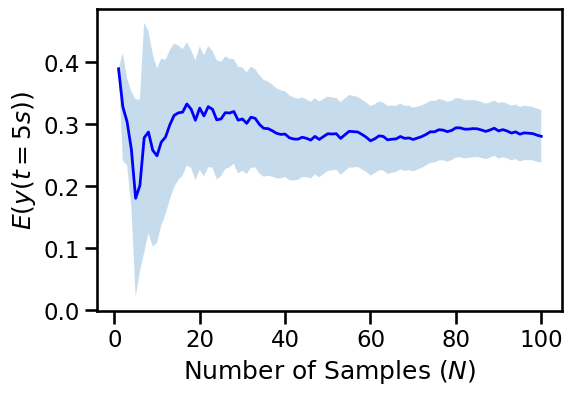

In [85]:
# Your code here
N = 100
samples = take_samples_from_solver(N)
# Sampled positions are: samples[:, :, 0]
# Sampled velocities are: samples[:, :, 1]
# Sampled position at the 10th timestep is: samples[:, 9, 0]
# etc.

# Evaluate the sample average for the Position and Velocity
Position_running = np.cumsum(samples[:, 4, 0]) / np.arange(1, N + 1)

# Evaluate the second moment for the Position and Velocity
Position_2_running = np.cumsum(samples[:, 4, 0] ** 2) /  np.arange(1, N + 1)

# Evaluate the running average of the variance
sigma2_running_position = Position_2_running - Position_running ** 2

# Alright, now we have quantified our uncertainty about I for every N
# from a single MC run. Let's plot a (about) 95% predictive interval
# Running lower bound for the predictive interval
Position_lower_running = Position_running - 2.0 * np.sqrt(sigma2_running_position / np.arange(1, N + 1))

# Running upper bound for the predictive interval
Position_upper_running = Position_running + 2.0 * np.sqrt(sigma2_running_position / np.arange(1, N + 1))


# The plot for Position estimates
fig, ax = plt.subplots(dpi=100)
# Shaded area for the interval
ax.fill_between(np.arange(1, N + 1), Position_lower_running, Position_upper_running, alpha=0.25)
# Here is the MC estimate:
ax.plot(np.arange(1, N+1), Position_running, 'b', lw=2)
# The true value
#ax.plot(np.arange(1, N+1), samples[99,:,0] , color='r')
# and the labels
ax.set_xlabel('Number of Samples $(N)$')
ax.set_ylabel(r'$E(y(t = 5s))$');


### Part C
Repeat part A and B for the squared response.
That is, do exactly the same thing as above, but consider $y^2(t)$ and $\dot{y}^2(t)$ instead of $y(t)$ and $\dot{y}(t)$.
How many samples do you need to estimate the mean squared response at $t=5$s with negligible epistemic uncertainty?

**Solution**:

Number of samples  to estimate the mean squared response at  t=5 s with negligible epistemic uncertainty is 1000
Note that N >= 500 may also be considered a good choice


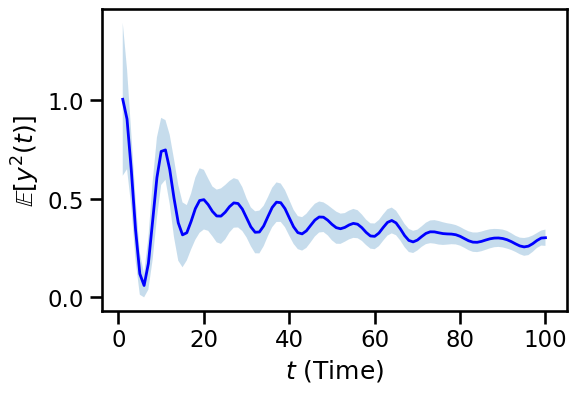

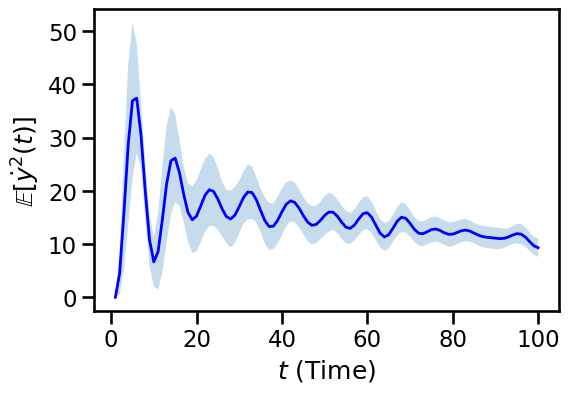

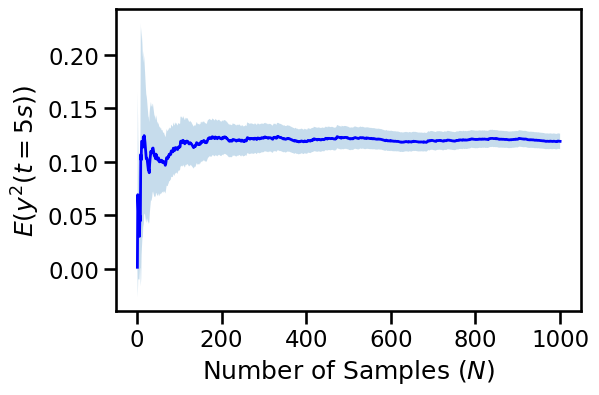

In [79]:
# (A) Repeated for the new quantities y^2(t) and \dot{y}.^2(t) 
samples_orig = take_samples_from_solver(100)
# Sampled positions are: samples[:, :, 0]
# Sampled velocities are: samples[:, :, 1]
# Sampled position at the 10th timestep is: samples[:, 9, 0]

# The square of the samples's position and velocity is the new sample vector
samples = samples_orig ** 2
N = 100

# Evaluate the sample average for the Position and Velocity
Position_running = np.cumsum(samples[:, :, 0], axis = 0)[-1,:] / N
Velocity_running = np.cumsum(samples[:, :, 1],axis=0)[-1,:] / N

# Evaluate the second moment for the Position and Velocity
Position_2_running = np.cumsum(samples[:, :,0] ** 2, axis = 0)[-1,:] / N
Velocity_2_running = np.cumsum(samples[:, :,1] ** 2, axis = 0)[-1,:] / N


# Evaluate the running average of the variance
sigma2_running_position = Position_2_running - Position_running ** 2
sigma2_running_velocity = Velocity_2_running - Velocity_running ** 2

# Alright, now we have quantified our uncertainty about I for every N
# from a single MC run. Let's plot a (about) 95% predictive interval
# Running lower bound for the predictive interval
Position_lower_running = Position_running - 2.0 * np.sqrt(sigma2_running_position / np.arange(1, N + 1))
Velocity_lower_running = Velocity_running - 2.0 * np.sqrt(sigma2_running_velocity / np.arange(1, N + 1))

# Running upper bound for the predictive interval
Position_upper_running = Position_running + 2.0 * np.sqrt(sigma2_running_position / np.arange(1, N + 1))
Velocity_upper_running = Velocity_running + 2.0 * np.sqrt(sigma2_running_velocity / np.arange(1, N + 1))

# The plot for Position estimates
fig, ax = plt.subplots(dpi=100)
# Shaded area for the interval
ax.fill_between(np.arange(1, N + 1), Position_lower_running, Position_upper_running, alpha=0.25)
# Here is the MC estimate:
ax.plot(np.arange(1, N+1), Position_running, 'b', lw=2)
# The true value
#ax.plot(np.arange(1, N+1), samples[99,:,0] , color='r')
# and the labels
ax.set_xlabel('$t$ (Time)')
ax.set_ylabel(r'$\mathbb{E}[y^2(t)]$'); 

# The plot for Velocity estimates
fig, ax = plt.subplots(dpi=100)
# Shaded area for the interval
ax.fill_between(np.arange(1, N + 1), Velocity_lower_running, Velocity_upper_running, alpha=0.25)
# Here is the MC estimate:
ax.plot(np.arange(1, N+1), Velocity_running, 'b', lw=2)
# The true value
#ax.plot(np.arange(1, N+1), samples[99,:,0] , color='r')
# and the labels
ax.set_xlabel('$t$ (Time)')
ax.set_ylabel('$\mathbb{E}[\dot{y}^{2}(t)]$')


# (B) Repeated for the square of the position
N = 1000
samples_orig = take_samples_from_solver(N)
samples = samples_orig**2

# Evaluate the sample average for the Position and Velocity
Position_running_squared_5 = np.cumsum(samples[:, 4, 0]) / np.arange(1, N + 1)

# Evaluate the second moment for the Position and Velocity
Position_2_running_squared_5 = np.cumsum(samples[:, 4, 0] ** 2) /  np.arange(1, N + 1)

# Evaluate the running average of the variance
sigma2_running_position_squared_5 = Position_2_running_squared_5 - Position_running_squared_5 ** 2

# Alright, now we have quantified our uncertainty about I for every N
# from a single MC run. Let's plot a (about) 95% predictive interval
# Running lower bound for the predictive interval
Position_lower_running_squared_5 = Position_running_squared_5 - 2.0 * np.sqrt(sigma2_running_position_squared_5 / np.arange(1, N + 1))

# Running upper bound for the predictive interval
Position_upper_running_squared_5 = Position_running_squared_5 + 2.0 * np.sqrt(sigma2_running_position_squared_5 / np.arange(1, N + 1))


# The plot for Position estimates
fig, ax = plt.subplots(dpi=100)
# Shaded area for the interval
ax.fill_between(np.arange(1, N + 1), Position_lower_running_squared_5, Position_upper_running_squared_5, alpha=0.25)
# Here is the MC estimate:
ax.plot(np.arange(1, N+1), Position_running_squared_5, 'b', lw=2)
# The true value
#ax.plot(np.arange(1, N+1), samples[99,:,0] , color='r')
# and the labels
ax.set_xlabel('Number of Samples $(N)$')
ax.set_ylabel(r'$E(y^2(t = 5s))$');

print('Number of samples  to estimate the mean squared response at  t=5 s with negligible epistemic uncertainty is '+ str(N))
print('Note that N >= '+ str(500) + ' may also be considered a good choice')




### Part D

Now that you know how many samples you need to estimate the mean of the response and the square response, use the formula:
$$
\mathbb{V}[y(t)] = \mathbb{E}[y^2(t)] - \left(\mathbb{E}[y(t)]\right)^2,
$$
and similarly for $\dot{y}(t)$, to estimate the variance of the position and the velocity with negligible epistemic uncertainty.
Plot both quantities as a function of time.

**Solution**:

(100,)


Text(0, 0.5, '$\\mathbb{V}[\\dot{y}(t)]$')

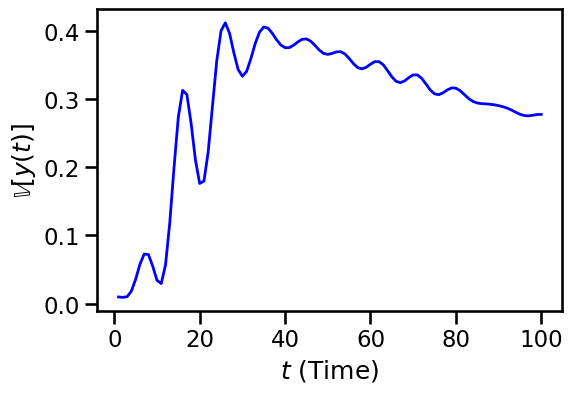

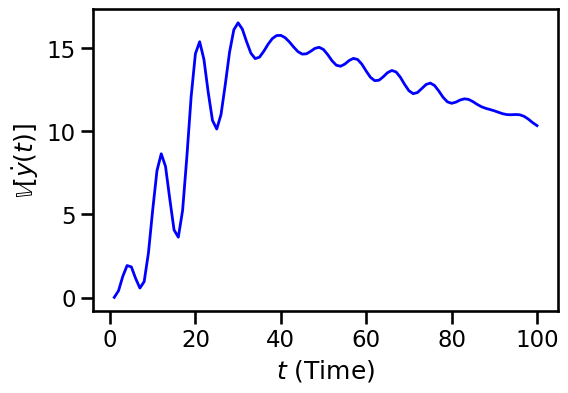

In [84]:
# Your code here
N = 1000
samples_orig = take_samples_from_solver(N)
t = samples_orig.shape[1]

# The square of the samples's position and velocity is the new sample vector
samples_squared = samples_orig ** 2

# Evaluate the sample average for the Position and Velocity
Position_running = np.cumsum(samples_orig[:, :, 0], axis = 0)[-1,:] / N
Velocity_running = np.cumsum(samples_orig[:, :, 1],axis=0)[-1,:] / N

# Evaluate the sample mean squared for the Position and Velocity
Position_2_running = np.cumsum(samples_squared[:, :,0], axis = 0)[-1,:] / N
Velocity_2_running = np.cumsum(samples_squared[:, :,1], axis = 0)[-1,:] / N


# Evaluate the running average of the variance
sigma2_running_position = Position_2_running - Position_running ** 2
sigma2_running_velocity = Velocity_2_running - Velocity_running ** 2
print(sigma2_running_position.shape)

# The plot for Position estimates
fig, ax = plt.subplots(dpi=100)
# Here is the MC estimate:
ax.plot(np.arange(1, t+1), sigma2_running_position, 'b', lw=2)
# and the labels
ax.set_xlabel('$t$ (Time)')
ax.set_ylabel(r'$\mathbb{V}[y(t)]$'); 

# The plot for Velocity estimates
fig, ax = plt.subplots(dpi=100)
# Here is the MC estimate:
ax.plot(np.arange(1, t+1), sigma2_running_velocity, 'b', lw=2)
# The true value
#ax.plot(np.arange(1, N+1), samples[99,:,0] , color='r')
# and the labels
ax.set_xlabel('$t$ (Time)')
ax.set_ylabel('$\mathbb{V}[\dot{y}(t)]$')



### Part E

Put together the estimated mean and variance to plot a 95\% predictive interval for the position and the velocity as functions of time.

**Solution**:

Text(0, 0.5, '$\\mathbb{E}[\\dot{y}(t)]$')

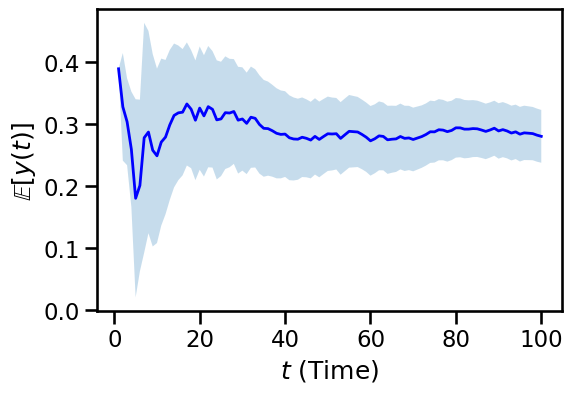

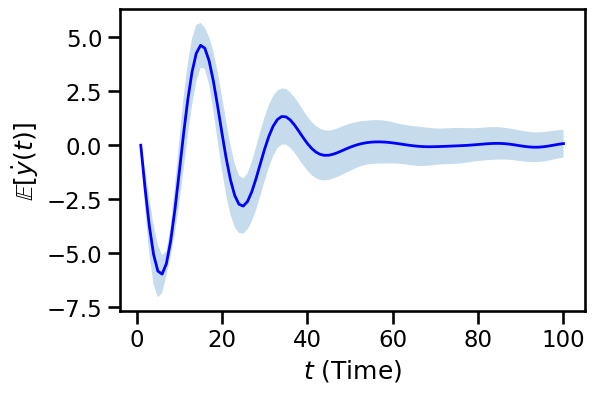

In [86]:
#  Let's plot a (about) 95% predictive interval for both Position and Velocity

# Running lower bound for the predictive interval for 
Position_lower_running = Position_running - 2.0 * np.sqrt(sigma2_running_position / np.arange(1, N + 1))
Velocity_lower_running = Velocity_running - 2.0 * np.sqrt(sigma2_running_velocity / np.arange(1, N + 1))

# Running upper bound for the predictive interval
Position_upper_running = Position_running + 2.0 * np.sqrt(sigma2_running_position / np.arange(1, N + 1))
Velocity_upper_running = Velocity_running + 2.0 * np.sqrt(sigma2_running_velocity / np.arange(1, N + 1))


# The plot for Position estimates
fig, ax = plt.subplots(dpi=100)
# Shaded area for the interval
ax.fill_between(np.arange(1, N + 1), Position_lower_running, Position_upper_running, alpha=0.25)
# Here is the MC estimate:
ax.plot(np.arange(1, N+1), Position_running, 'b', lw=2)
# The true value
#ax.plot(np.arange(1, N+1), samples[99,:,0] , color='r')
# and the labels
ax.set_xlabel('$t$ (Time)')
ax.set_ylabel(r'$\mathbb{E}[y(t)]$'); 

# The plot for Velocity estimates
fig, ax = plt.subplots(dpi=100)
# Shaded area for the interval
ax.fill_between(np.arange(1, N + 1), Velocity_lower_running, Velocity_upper_running, alpha=0.25)
# Here is the MC estimate:
ax.plot(np.arange(1, N+1), Velocity_running, 'b', lw=2)
# The true value
#ax.plot(np.arange(1, N+1), samples[99,:,0] , color='r')
# and the labels
ax.set_xlabel('$t$ (Time)')
ax.set_ylabel('$\mathbb{E}[\dot{y}(t)]$')

-End-